# Corona
### Correlation as features
---
# Feature Subset Selection
---

#### Abstract
Feature subset selection (FSS) is a known technique to pre-process the data before performing any data mining tasks, e.g., classification and clustering. FSS provides both cost-effective predictors and a better understanding of the underlying process that generated data. We propose Corona, a simple yet effective supervised feature subset selection technique for Multivariate Time Series (MTS).

#### Data
Multi-variant time series data of SWAM_SF.

#### Model

![model](/images/model.PNG)

### Setup Project
- git clone https://ShreeTalla@bitbucket.org/gsudmlab/mvts_fss_st.git
- cd mvts_fss_st
- python -m venv venv
- source ./venv/bin/activate
- (venv) mvts_fss_st> pip3 install -r ./requirements.txt

### Steps:

#### Import required libraries

In [2]:
from feature_selection.vectorize import Vectorize
from feature_selection.corona import Corona
import numpy as np
import pandas as pd
from undersampling.undersampling import Undersampling

#### Undersample
Undersampling data using climatelogy preserving 

In [3]:
undersample = Undersampling(r"D:\GSU_Assignments\Summer_sem\6999\partition1_instances\partition1", ["FL","NF"],24)
undersample.get_flare_type_metadata()
undersample.get_undersample_metadata()

sampling M done
sampling X done
sampling B done
sampling C done
sampling FQ done


(2416, 237, 285, 410, 1958)

In [4]:
cm_list = undersample.final_list

#### Corona

In [6]:
corona = Corona(cm_list, 24, 10)
corona.feature_matrix()
corona.get_classes()
features = corona.features
classes = corona.classes

In [7]:
ranks = corona.rank_variables()
ranks_weights = corona.arrange_ranks(ranks)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [9]:
ranks_weights = np.sum(symmetric_matrix,axis=0)
ranks_weights = ranks_weights

#### Plot Ranks

[512.0, 1196.0, 1576.0, 1713.0, 2079.0, 2348.0, 2397.0, 2521.0, 2544.0, 2583.0, 2619.0, 2620.0, 2680.0, 3100.0, 3117.0, 3371.0, 3474.0, 3574.0, 3577.0, 4335.0, 4500.0, 4907.0, 4909.0, 5346.0] ['TOTFX', 'TOTFY', 'TOTFZ', 'ABSNJZH', 'MEANGBT', 'TOTBSQ', 'MEANGBZ', 'TOTPOT', 'MEANPOT', 'MEANSHR', 'TOTUSJH', 'SHRGT45', 'SAVNCPP', 'TOTUSJZ', 'USFLUX', 'EPSZ', 'R_VALUE', 'MEANGAM', 'MEANGBH', 'EPSX', 'MEANJZD', 'EPSY', 'MEANJZH', 'MEANALP']


<AxesSubplot:>

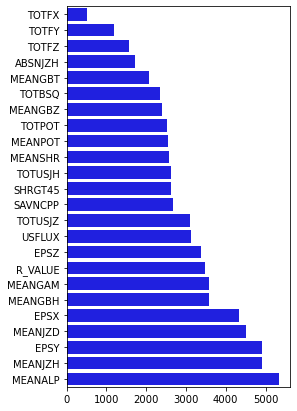

In [9]:
from sortedcontainers import SortedDict
import seaborn as sns
import matplotlib.pyplot as plt

ranks_dict = SortedDict({})
for i in range(0,24):
    ranks_dict[ranks_weights[i]] = columns[i]
keys = list(ranks_dict.keys())
values = list(ranks_dict.values())
print(keys,values)

fig, ax = plt.subplots(figsize=(4, 7))
sns.barplot(y=values, x=keys,color = '#0000FF', ax=ax)

<AxesSubplot:xlabel='rank', ylabel='features'>

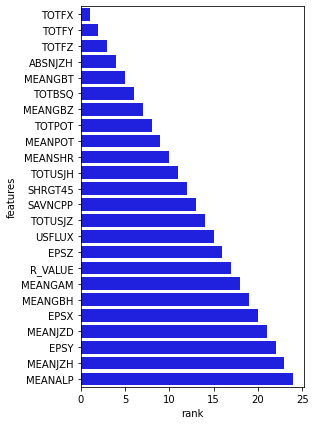

In [25]:
dict_w = list()
for i in range(0,24):
    dict_w.append({"weights":ranks_weights[i], "features":columns[i]})
df_w = pd.DataFrame.from_dict(dict_w)

df_w["rank"] = df_w["weights"].rank(method='max')

df_sort = df_w.sort_values(by='rank')

fig, ax = plt.subplots(figsize=(4, 7))
sns.barplot(y=df_sort["features"], x=df_sort["rank"],color = '#0000ff', ax=ax)

In [24]:
df_sort.to_excel("ranks.xlsx", index=False)